### SimpleRNN을 이용한 SMS Spam 분류
 - 캐글 데이터 : url = 'https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv'


In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv'

In [3]:
df = pd.read_csv(url, encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- 데이터 전처리

In [4]:
# Selection
df = df[['v1', 'v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [6]:
# 중복 데이터 확인
import numpy as np
df.shape, df.v2.nunique()

((5572, 2), 5169)

In [7]:
df.drop_duplicates(subset=['v2'], inplace=True)

In [8]:
df.shape, df.v2.nunique()

((5169, 2), 5169)

In [9]:
# ['ham', 'spam'] > [0, 1]
df.v1 = df.v1.replace(['ham', 'spam'], [0, 1])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.v1.value_counts()

0    4516
1     653
Name: v1, dtype: int64

In [11]:
# 전처리완료된 파일을 만들어 둔다.
df.to_csv('스팸_전처리완료.csv', index=False)


In [12]:
x, y = df.v2.values, df.v1.values
x.shape, y.shape

((5169,), (5169,))

- 텍스트 전처리

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
# encoding, 구둣점 제거, 소문자로 변환
import re
def preprocessing(s):
    s = s.encode('utf8').decode('ascii', 'ignore')
    s = re.sub('[^a-z0-9 ]', '', s.lower())
    return s

In [15]:
X_data = [preprocessing(sent) for sent in x]
X_data[2]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'

In [16]:
t = Tokenizer()
t.fit_on_texts(X_data)

In [17]:
vocab_size = len(t.word_index) + 1
vocab_size

9479

In [18]:
print(t.texts_to_sequences(X_data)[2])

[54, 508, 8, 22, 4, 959, 960, 2, 217, 2566, 1291, 664, 2567, 2568, 268, 2569, 71, 2566, 2, 2570, 2, 336, 508, 3839, 84, 3840, 424, 3841]


In [19]:
sequences = []
for line in X_data:
    encoded = t.texts_to_sequences([line])[0]
    sequences.append(encoded)
    # for i in range(1, len(encoded)):
    #     sequences.append(encoded[:i+1])
sequences[:15]

[[43,
  410,
  3837,
  729,
  663,
  699,
  65,
  8,
  1138,
  93,
  118,
  459,
  1139,
  146,
  2565,
  1140,
  68,
  56,
  3838,
  133],
 [51, 281, 1290, 411, 6, 1666],
 [54,
  508,
  8,
  22,
  4,
  959,
  960,
  2,
  217,
  2566,
  1291,
  664,
  2567,
  2568,
  268,
  2569,
  71,
  2566,
  2,
  2570,
  2,
  336,
  508,
  3839,
  84,
  3840,
  424,
  3841],
 [6, 211, 144, 24, 325, 2571, 6, 159, 135, 58, 144],
 [885, 1, 44, 88, 70, 425, 2, 833, 70, 1667, 188, 103, 426],
 [774,
  107,
  68,
  1449,
  42,
  100,
  182,
  579,
  23,
  7,
  40,
  362,
  82,
  363,
  57,
  105,
  364,
  3,
  41,
  12,
  14,
  83,
  1668,
  51,
  345,
  1292,
  3842,
  2,
  72,
  365,
  2,
  2572],
 [207, 11, 596, 9, 26, 57, 2, 366, 34, 10, 104, 629, 10, 57, 3843, 3844],
 [78,
  229,
  13,
  1450,
  2573,
  2573,
  2574,
  3845,
  3846,
  3847,
  119,
  100,
  597,
  78,
  13,
  1669,
  12,
  52,
  2575,
  1293,
  526,
  2,
  1294,
  13,
  248,
  1669],
 [730,
  78,
  4,
  961,
  427,
  240,
  3,
  16,
 

In [20]:
len(sequences)

5169

In [21]:
max_len = max(len(seq) for seq in sequences)
max_len

171

In [22]:
# 전체 데이터를 max_len 길이에 맞도록 0 padding
data = pad_sequences(sequences, maxlen=max_len)

In [23]:
data[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

- train/test data set 분리

In [24]:
data.shape, y.shape

((5169, 171), (5169,))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, y, stratify= y, test_size=0.2,

)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 171), (1034, 171), (4135,), (1034,))

In [26]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [51]:
model = Sequential([
    Embedding(vocab_size, 32, input_length = max_len),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 171, 32)           303328    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 305,441
Trainable params: 305,441
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [53]:
model_path = 'best-spam-rnn.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

In [54]:
hist1 = model.fit(X_train, y_train, validation_split=0.2, 
    epochs=200, batch_size=64, 
    verbose = 1,
    callbacks = [mc, es])

Epoch 1/200
52/52 [==============================] - ETA: 0s - loss: 0.4185 - accuracy: 0.8576
Epoch 1: val_loss improved from inf to 0.27469, saving model to best-spam-rnn.h5
52/52 [==============================] - 17s 258ms/step - loss: 0.4185 - accuracy: 0.8576 - val_loss: 0.2747 - val_accuracy: 0.9154
Epoch 2/200
52/52 [==============================] - ETA: 0s - loss: 0.1433 - accuracy: 0.9625
Epoch 2: val_loss improved from 0.27469 to 0.10449, saving model to best-spam-rnn.h5
52/52 [==============================] - 8s 151ms/step - loss: 0.1433 - accuracy: 0.9625 - val_loss: 0.1045 - val_accuracy: 0.9710
Epoch 3/200
52/52 [==============================] - ETA: 0s - loss: 0.0718 - accuracy: 0.9813
Epoch 3: val_loss did not improve from 0.10449
52/52 [==============================] - 8s 158ms/step - loss: 0.0718 - accuracy: 0.9813 - val_loss: 0.1067 - val_accuracy: 0.9649
Epoch 4/200
52/52 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9918
Epoch 4: val_

In [55]:
y_acc = hist1.history['accuracy']
y_loss = hist1.history['loss']
xs = np.arange(1, len(y_acc) + 1)

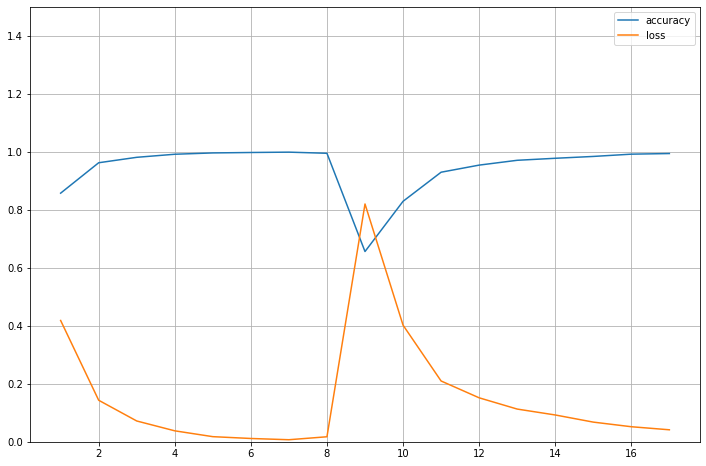

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()